In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency, chi2
from scipy.stats import mannwhitneyu

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

### Задание 3. Python
1.Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.<br>
2.Реализуйте функцию, которая будет строить графики по получаемым метрикам.


In [2]:
# Как и в первом задании загружаю файлы в одноименные датафреймы, кроме groups_add, 
# так как он будет подгружаться автоматически при использовании будующей функции.

groups = pd.read_csv('~/files_for_final_project/Проект_2_groups.csv', sep=';')
active_studs = pd.read_csv('~/files_for_final_project/Проект_2_active_studs.csv')
checks = pd.read_csv('~/files_for_final_project/Проект_2_checks.csv', sep=';')

### 1

In [3]:
# создаю функцию.
# Сначала выгружаем файл groups_add и объединяем с groups.
# Далее, аналогично первому, заданию расчитываем конверсию(cr) и средний чек(avg_check).
# Обединяем все в одну таблицу и выводим ее.

def my_function(groups, active_studs,checks):
    groups_add = pd.read_csv('~/files_for_final_project/groups_add.csv') 
    group = pd.concat([groups, groups_add], ignore_index=True)
    
    active_users = group[group.id.isin(active_studs['student_id'])].reset_index(drop=True)
    df1 = active_users.merge(checks, how='left', left_on = 'id', right_on = 'student_id')[['id','grp','rev']].fillna(0)
    df1['conv'] = df1.rev.apply(lambda x: 'buy' if x > 0 else 'not_buy')
    df2 = df1.query('conv == "buy"')
    
    cr = ((df1.query('rev > 0').groupby('grp').agg({'id':'count'}) / df1.groupby('grp').agg({'id':'count'})) *  100) \
        .round(2).rename(columns={'id':'CR'}).reset_index()
    
    arppu = df2.groupby('grp').agg({'rev':'sum', 'id':'count'})
    arppu['ARPPU'] = arppu.rev / arppu.id
    
    my_function_table = cr.merge(arppu[['ARPPU']].reset_index(), how = 'inner', on = 'grp')
    
    my_function_table['ARPU'] = ((my_function_table.CR * my_function_table.ARPPU) / 100).round(2)
    
    return my_function_table

In [4]:
# Передаю в функцию датафреймы загруженные вначале и записываю результат в отдельную переменную
metrics = my_function(groups, active_studs,checks)
metrics

,grp,CR,ARPPU,ARPU
0,A,5.07,933.589744,47.33
1,B,4.62,1257.878992,58.11


### 2

In [5]:
# создаю функцию для визуализации расчитанных метрик
def graph(metrics):
    metrics.plot(x = 'grp', legend= True, kind ='bar', subplots = True, figsize=(10,15), rot = 360, fontsize = 15)

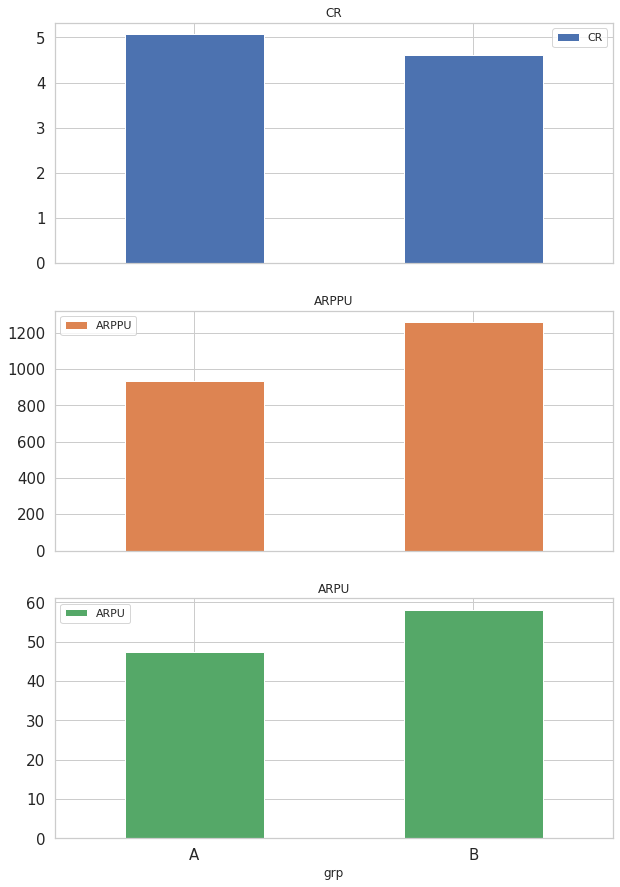

In [6]:
graph(metrics)